In [26]:
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading up data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [3]:
# Cleaning up data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda job_skill: ast.literal_eval(job_skill) if pd.notna(job_skill) else job_skill
)

In [4]:
# Only get data analyst jobs in the US
df_DA_US = df.loc[
    (df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")
]

Text(0.5, 1.0, 'Top Counts of Job Location for Data Analyst in the US')

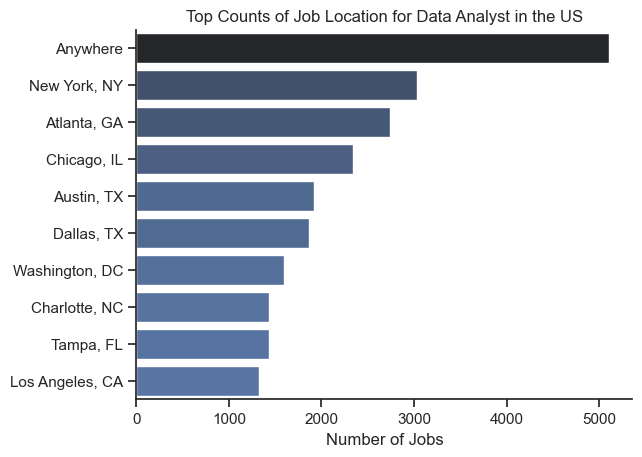

In [37]:
df_DA_US_plot = df_DA_US["job_location"].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(
    data=df_DA_US_plot,
    x="count",
    y="job_location",
    hue="count",
    palette="dark:b_r",
    legend=None,
)
sns.despine()
plt.xlabel("Number of Jobs")
plt.ylabel(None)
plt.title("Top Counts of Job Location for Data Analyst in the US")

Text(0.5, 0.98, 'Benefit Analysis of Data Analyst Jobs in the US')

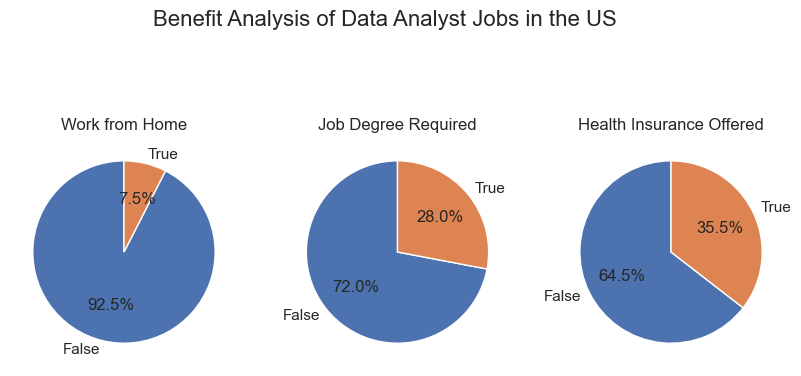

In [69]:
dict_column = {
    "job_work_from_home": "Work from Home",
    "job_no_degree_mention": "Job Degree Required",
    "job_health_insurance": "Health Insurance Offered",
}
fig, ax = plt.subplots(1, 3)
for i, (column, title) in enumerate(dict_column.items()):
    df_DA_US[column].value_counts().plot(
        kind="pie", ax=ax[i], autopct="%1.1f%%", startangle=90, ylabel="", title=title
    )
fig.set_size_inches((10, 5))
fig.suptitle("Benefit Analysis of Data Analyst Jobs in the US", fontsize=16)

Text(0.5, 1.0, 'Top Counts of Companies for Data Analyst in the US')

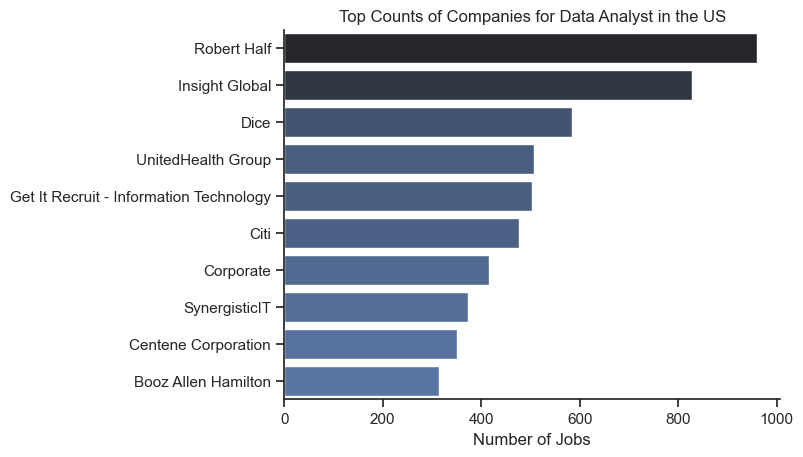

In [70]:
df_DA_US_company = df_DA_US["company_name"].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(
    data=df_DA_US_company,
    x="count",
    y="company_name",
    hue="count",
    palette="dark:b_r",
    legend=None,
)
sns.despine()
plt.xlabel("Number of Jobs")
plt.ylabel(None)
plt.title("Top Counts of Companies for Data Analyst in the US")